**Instituto Tecnológico de Costa Rica**

**Escuela de Ingeniería en Computación**

**Curso: Inteligencia Artificial**

**Segundo Semestre 2021**

**Profesor: Luis-Alexander Calvo-Valverde**

**Trabajo Práctico:** 03

**Datos de la entrega:** Domingo 03 de octubre 2021, a más tardar a las 11:59 pm

**Estudiantes:**
- Jose Pablo Salazar Granados
- Lindsay Fernanda Morales Bonilla





___

# Parte 1  -  Ejercicio
___

# Introducción

Considere:
- Se le proporciona un conjunto de datos (Concrete_Data - USAR)-
- El objetivo de esta parte es ver como el estudiante se enfrenta al proceso de pre-procesamiento, selección de atributos, predicción y evaluación.  Por eso es muy importante que documente en este cuaderno sus decisiones, eso se tomará muy en cuenta en la evaluación de su respuesta.
- El atributo a predecir en regresión se denomina: **Cement**.
- Debe comentar ampliamente su código
- El profesor hará el rol del **cliente** por si tiene consultas sobre el conjunto de datos.


### Sobre este dataset 

Name -- Data Type -- Measurement -- Description

- id -- quantitative -- integer
- Cement -- quantitative -- kg in a m3 mixture 
- Blast Furnace Slag -- quantitative -- kg in a m3 mixture 
- Fly Ash -- quantitative -- kg in a m3 mixture 
- Water -- quantitative -- kg in a m3 mixture 
- Superplasticizer -- quantitative -- kg in a m3 mixture 
- Coarse Aggregate -- quantitative -- kg in a m3 mixture 
- Fine Aggregate -- quantitative -- kg in a m3 mixture 
- Age -- quantitative -- Day (1~365) 
- Concrete compressive strength -- quantitative -- MPa 


### 1 (10 puntos)
- Cargue el archivo.
- Utilice las herramientas (gráficos, funciones que describen contenido o características de las variables, etc) que considere necesarias para analizar los atributos que tiene el dataset y ver si tiene valores faltantes, valores atípicos, etc.
- Comente sus conclusiones sobre los atritubos.


In [94]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib.pyplot import figure
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

#The file is not comma separated but is using ";"
data = pd.read_csv('Concrete_Data - USAR.csv', sep=";")

### TESTING SECTION

   id  cement   slag  flyash  water  superplasticizer  coarseaggregate  \
0   1   540.0    0.0     0.0  162.0            2500.0           1040.0   
1   2   540.0    0.0     0.0  162.0               2.5           1055.0   
2   3   332.5  142.5     0.0  228.0               0.0            932.0   
3   4   332.5  142.5     0.0  228.0               0.0            932.0   
4   5   198.6  132.4     0.0  192.0               0.0            978.4   
5   6   266.0  114.0     0.0  228.0               0.0              NaN   
6   7   380.0   95.0     0.0  228.0               0.0            932.0   
7   8   380.0   95.0     0.0  228.0               0.0            932.0   
8   9   266.0  114.0     0.0  228.0               0.0            932.0   
9  10   475.0    0.0     0.0  228.0               0.0            932.0   

   fineaggregate  age  csMPa  
0          676.0   28  79.99  
1          676.0   28  61.89  
2          594.0  270  40.27  
3          594.0  365  41.05  
4          825.5  360  44.30  

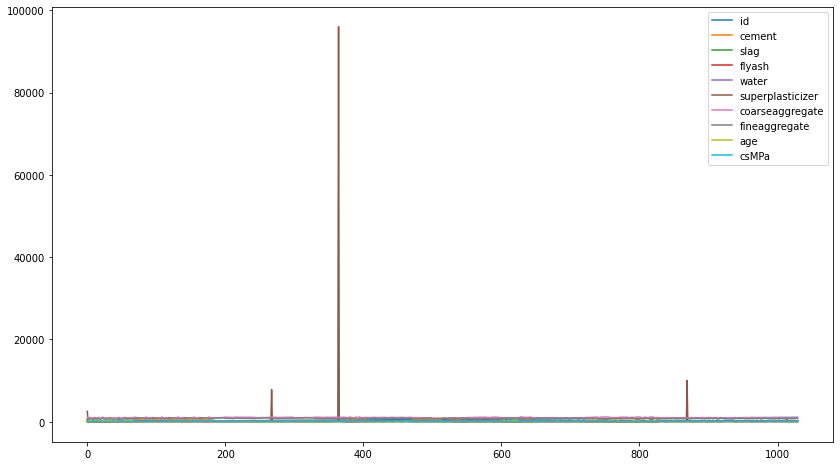

La grafiación de los otros elementos


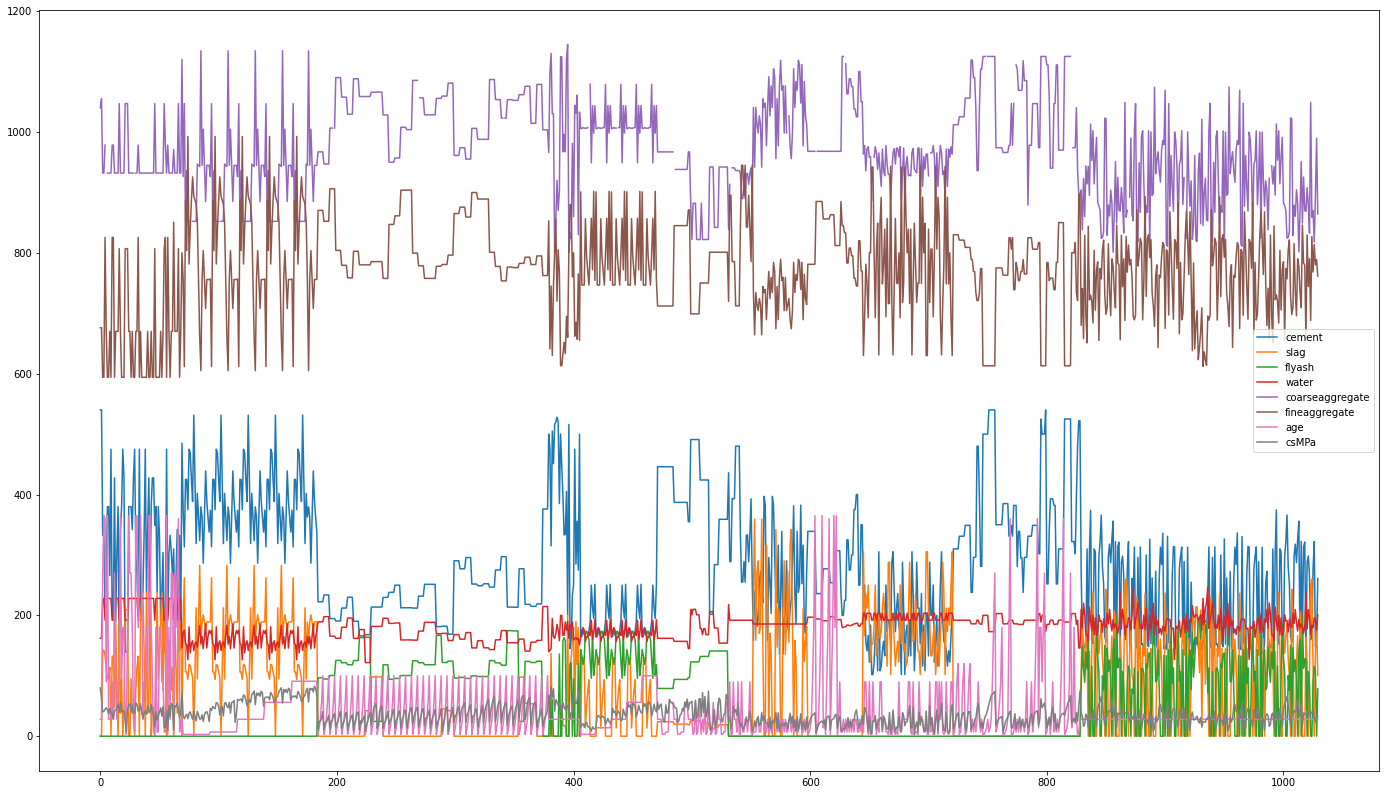

Buscamos valores fuera de los bigotes


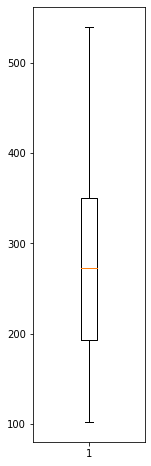

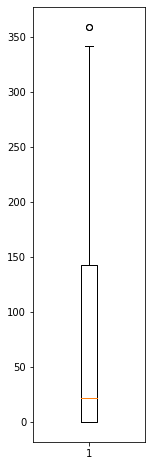

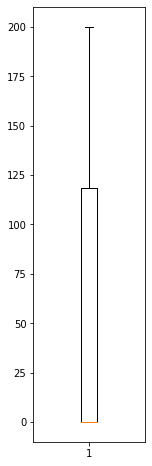

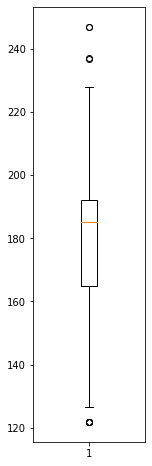

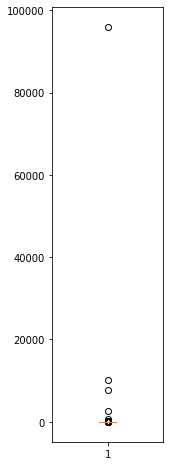

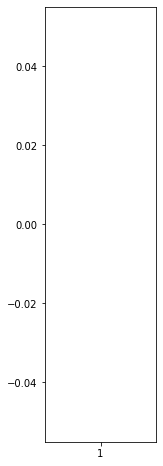

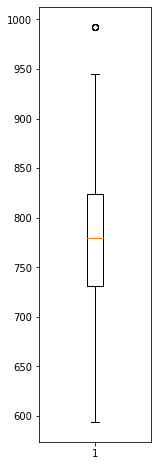

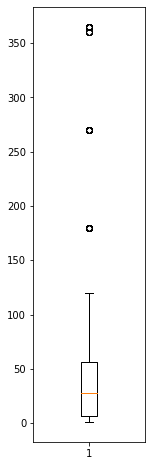

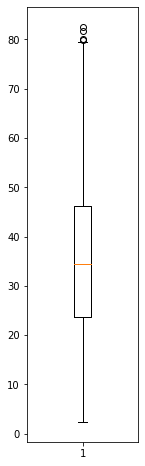

Descripcion de la variable superplasti:  count     1030.000000
mean       119.511165
std       3017.404502
min       -100.000000
25%          0.000000
50%          6.400000
75%         10.300000
max      96000.000000
Name: superplasticizer, dtype: float64
Ahora observaremos por separado la columna superplasticizer


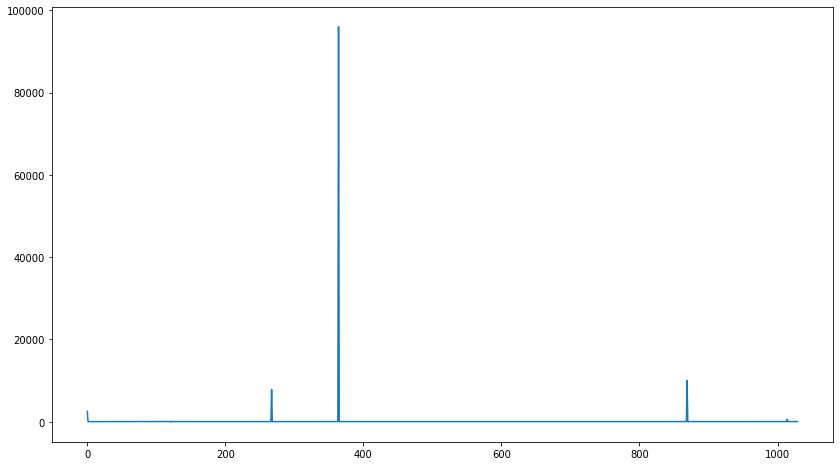

Outliers of superplasticizer:
2500.0
-100.0
7800.0
96000.0
10000.0
550.0
Una vez eliminados los Outliers podemos ver la columna


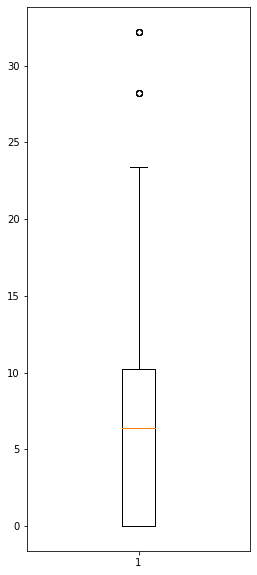

Ahora observamos segun rangos similares los datos y obtenemos que


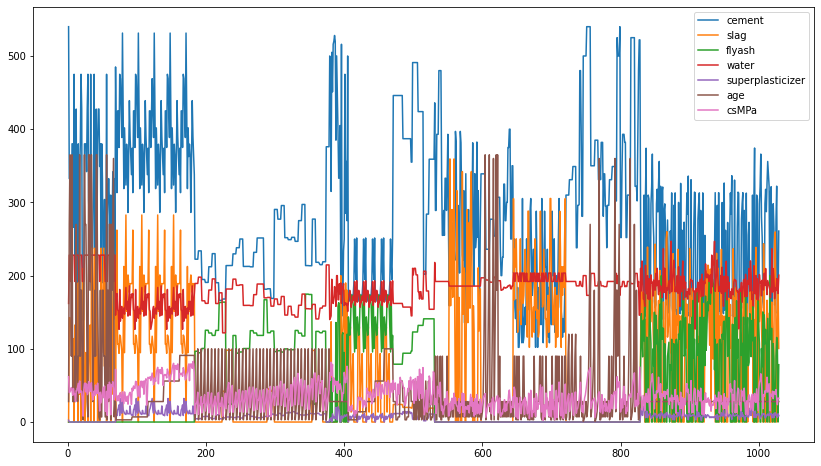

And lastly, we show the values that  are higher


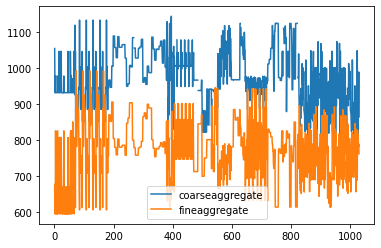

In [104]:
# We explore the initial contents
print(data.head(10))


# A Deep copy is created to do exploration without data corruption
dataAux = data.copy(deep=True)

# We plot the data to visualize it all together
figure(figsize=(14,8))
for column in data.columns:
    plt.plot(data[column], label=column)
plt.legend()
plt.show()

# Since super and id are disturbing the view, we'll ignore it for a moment
# Normal Plot 
print("La grafiación de los otros elementos sin la distorción de la columna superplasti")
figure(figsize=(24,14)) # Augment figure size to appreciate details in a better way
for column in data.columns:
    if column == "id": continue
    if column == "superplasticizer": continue
    plt.plot(dataAux[column], label=column)
plt.legend()
plt.show()

# BoxPlot to spot outliers
print("Buscamos valores fuera de los bigotes")

for column in data.columns:
    #TODO: Position them side by side
    if column == "id": continue #no es de nuestro interés
    figure(figsize=(2,8))
    plt.boxplot(dataAux[column])    
    plt.show()
    

# COLUMN EXPLORATION
#Seems like superplasticizer has HIGHER values and really low values too!
print("Descripcion de la variable superplasti: ", dataAux["superplasticizer"].describe())

print("Ahora observaremos por separado la columna superplasticizer")
figure(figsize=(14,8))
plt.plot(dataAux["superplasticizer"], label="superplasticizer")
plt.show()


# Check for the outliers
print("Outliers of superplasticizer:")
for elem in dataAux["superplasticizer"]:
    if elem>500 or elem<0:
        print(elem)
        
# The outliers in range are eliminated
index_names = dataAux[ (dataAux["superplasticizer"] > 500) | (dataAux["superplasticizer"] < 0)].index
dataAux.drop(index_names, inplace = True)   

print("Una vez eliminados los Outliers podemos ver la columna")
figure(figsize=(4,10))
plt.boxplot(dataAux["superplasticizer"])
plt.show()

# Re-Plotting the data without outliers (Data Auxiliar, not on the real df)
print("Ahora observamos segun rangos similares los datos y obtenemos que")
figure(figsize=(14,8))
columnsToHide = ["id", "coarseaggregate", "fineaggregate"]
for column in dataAux.columns:
    if column in columnsToHide: continue 
    plt.plot(dataAux[column], label=column)
plt.legend()
plt.show()


print("And lastly, we show the values that  are higher")
higherValues = columnsToHide[1:] # We pop the id from the list
figure(figsize=(14,8))
for column in dataAux.columns:
    if column not in higherValues: continue 
    plt.plot(dataAux[column], label=column)
plt.legend()
plt.show()

### 2 (5 puntos)
- Se utilizará el modelo Train/Validation (70%)  y Test (30%). 
- Comente su decisión sobre los parámetros shuffle y random_state
- Separe  los  conjuntos de datos (70-30) (X_trainVal, X_test, y_trainVal, y_test )
- Muestre los primeros 5 registros de cada conjunto.


### 3  (15 puntos)
- Preprocese los atributos (Solo deje para más adelante escalar los datos).
- Debe comentar en celdas del texto el por qué seleccionó las técnicas utilizadas.

### 4 (10 puntos)
- Realice selección de atributos.
- Debe utilizar al menos una técnica para justificar su decisión (De entre los métodos: Filter, Wrapper, Embedded).
- ¿Qué hará con el atributo denominado: "Id"?
- Comente sus conclusiones.


### 1.5  (5 puntos)
- Escale los datos.
- Comente qué técnica utilizó y por qué.
- Guarde el archivo ya pre-procesado con el nombre: "'Concrete_DataPROCESADO"

**Nota:** No olvide cómo manejará el "bias" (o agregar columna de unos, o si la implementación de los algoritmos que utilizará permiten indicarle que lo agregue).


### 1.6 (20 puntos)
Presente e implemente un diseño experimental que incluya:
- Cuatro algoritmos diferentes:
    - Uno será la regresión lineal de mínimos cuadrados sin regularización (OLSR).
    - Otro el método de regresión RIDGE.
    - Usted eligirá dos métodos más de regresión, que no sean de los vistos en clase. Si tiene dudas de si puede o no usar algún método, puede consultar al profesor.
    - Como el OLSR no tiene hiperparámetros, use todo el train/validation para entrenar. Para los otros dos métodos, debe usar ten-cross-validation para seleccionar **al menos un hiperparámetro**.
    - Debe registrar las métricas RMSE y R2. Usted decide cuál de estas dos métricas usa para selecionar la mejor configuración (Justifique su selección). Recuerde aspectos como analizar promedios y desviaciones estándar.
    
**Nota:** Para cada uno de los dos algoritmos seleccionados (no el OLSR) explique los parámetros que recibe. 
    

### 1.7 (15 puntos)

- Por medio de una tabla u otro método idóneo que Usted determine, resuma todos los resultados obtenidos (o la mayoría).
- Grafique comparativamente los valores del real versus el predicho (test), de cada uno de los métodos utilizados.  
- Si tuviera que recomendar un método a usar con este dataset ¿cuál sería de los comparados y por qué?
- Qué conclusiones finales saca sobre los métodos usados como predictores.

___

# Parte 2  -  Temas por grupo (20 puntos)
___

Considere lo siguiente:
1. Revise en el archivo PDF: "Temas por grupo", qué cuadernos jupyter le corresponden a su grupo.
1. Estudie los cuadernos asignados.
1. Prepare un único cuaderno de jupyter (comentando con celdas de texto en español), en que resume y explica las técnicas asignadas. 
1. Prepare un video para una posible presentación de sus temas en clase, no debe durar más 12 minutos en la presentación de los temas asignados (Considere que el material preparado será compartido con sus compañer(a/o)s del curso y por tanto se espera que se esmere en su elaboración y clara explicación -- por favor -- ). 